# Importing Libraries and Dataset

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
clicks_df_ = pd.read_csv("/content/clicks_dataset.csv", encoding='ISO-8859-1')
clicks_df = clicks_df_.copy()
clicks_df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


# Explorer Data Analysis



In [9]:
clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [10]:
clicks_df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [11]:
clicks_df.isnull().sum()

,0
Names,0
emails,0
Country,0
Time Spent on Site,0
Salary,0
Clicked,0


<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

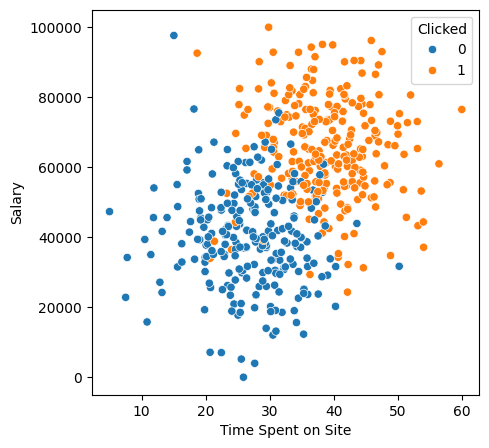

In [14]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x= clicks_df['Time Spent on Site'], y= clicks_df['Salary'],
               hue=clicks_df['Clicked'])

* **As Salary and Time Spent on Site increases, the click-through rate also increases.**

<ipython-input-32-571e3d97ef3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked', y='Salary', data= clicks_df, palette='Set1' )


Text(0.5, 1.0, 'Salary - Clicked')

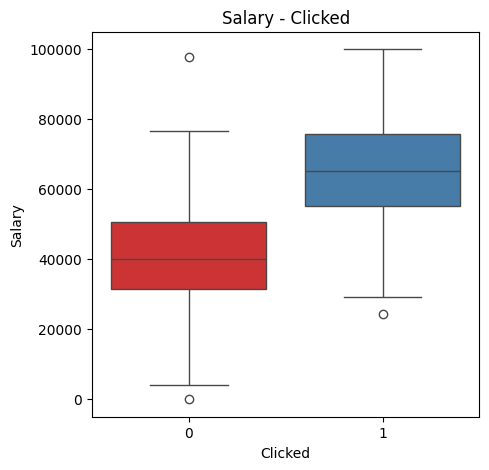

In [32]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Clicked', y='Salary', data= clicks_df, palette='Set1' )
plt.title('Salary - Clicked')

* **Some outliers seems.**

<ipython-input-30-b12c69ab82b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked', y='Time Spent on Site', data= clicks_df , palette='Set1')


Text(0.5, 1.0, 'Time Spent on Site - Clicked')

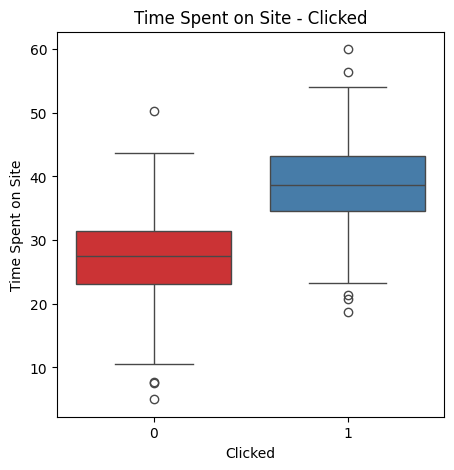

In [30]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Clicked', y='Time Spent on Site', data= clicks_df , palette='Set1')
plt.title('Time Spent on Site - Clicked')

Text(0.5, 1.0, 'Salary')

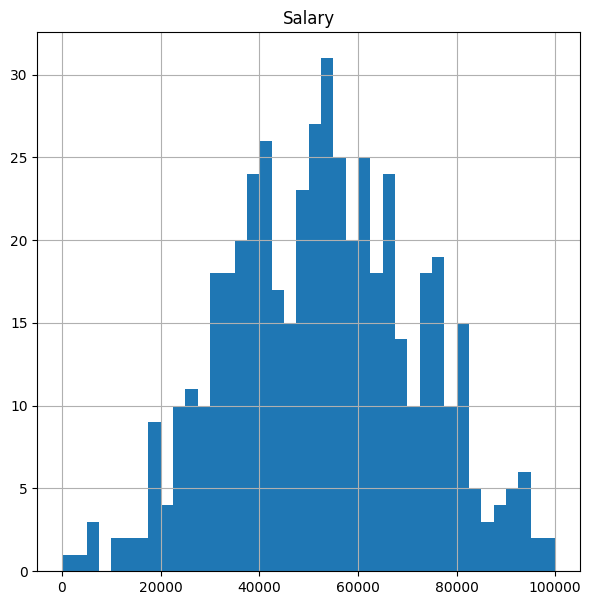

In [22]:
plt.figure(figsize=(7,7))
clicks_df['Salary'].hist(bins=40)
plt.title('Salary')

Text(0.5, 1.0, 'Time Spent on Site')

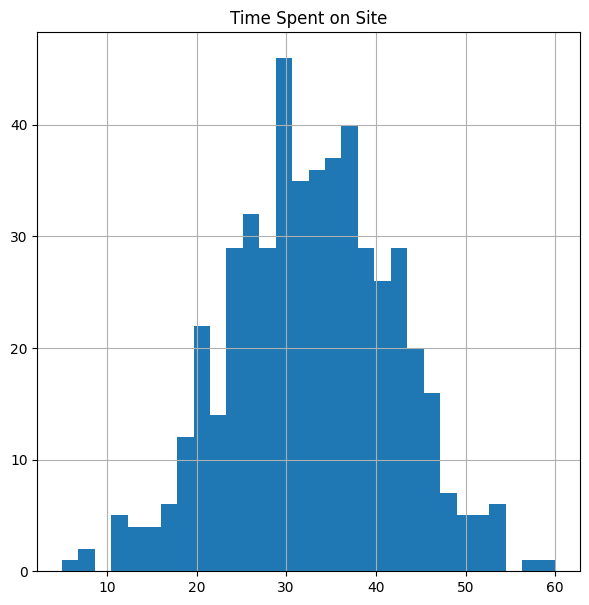

In [33]:
plt.figure(figsize=(7,7))
clicks_df['Time Spent on Site'].hist(bins=30)
plt.title('Time Spent on Site')

# Data Preparation

In [39]:
clicks_df.drop(['Names', 'emails', 'Country'],axis=1, inplace=True)

KeyError: "['Names', 'emails', 'Country'] not found in axis"

In [37]:
X = clicks_df.drop('Clicked',axis=1).values
y= clicks_df['Clicked'].values

## Scaling

In [38]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Model

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [91]:
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=123)
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=500,
                           random_state=123)

In [92]:
y_predict_train = model.predict(X_train)
y_predict_train

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((399, 2), (100, 2), (399,), (100,))

## Confusion Matrix

Text(50.722222222222214, 0.5, 'Predictions')

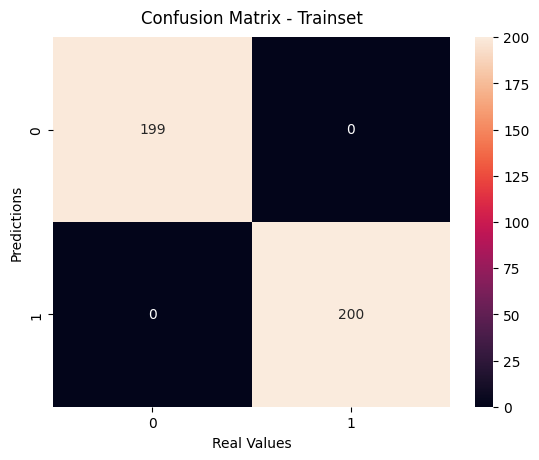

In [93]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - Trainset', pad=10)
plt.xlabel('Real Values')
plt.ylabel('Predictions')

Text(50.722222222222214, 0.5, 'Predictions')

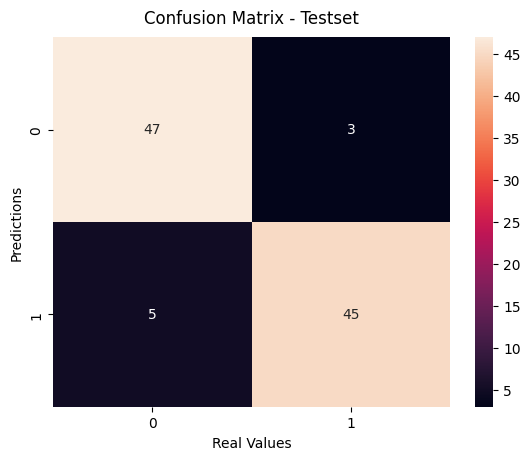

In [94]:
y_predict_test  = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - Testset', pad=10)
plt.xlabel('Real Values')
plt.ylabel('Predictions')

In [95]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        50
           1       0.94      0.90      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [96]:
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


In [71]:
X1.shape

(728, 805)

In [77]:
X1.max(), X1.min(), X2.max(), X2.min()

(3.969935060416221, -4.070064939583608, 3.482620744339657, -3.787379255660188)

(-3.787379255660188, 3.482620744339657)

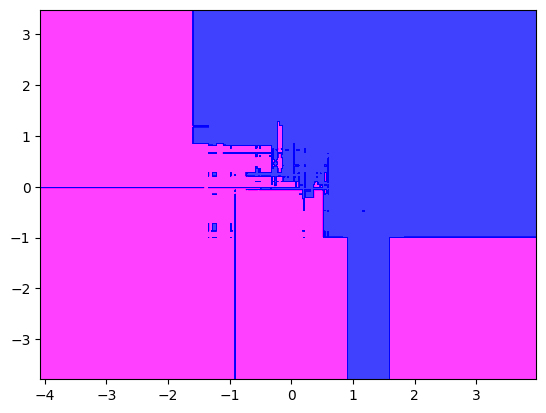

In [97]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

<ipython-input-98-b25de135507c>:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


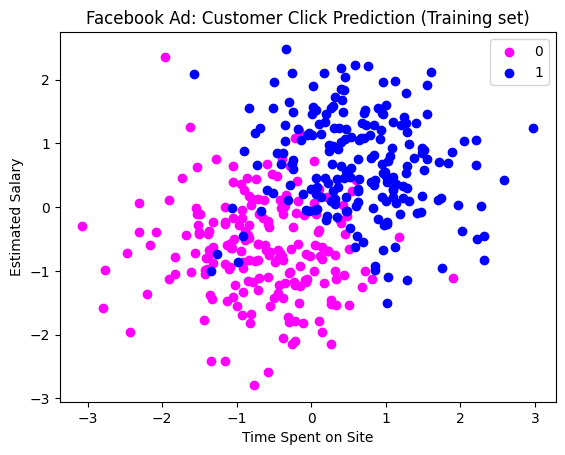

In [98]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)

plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-99-aa7b252b9d0c>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


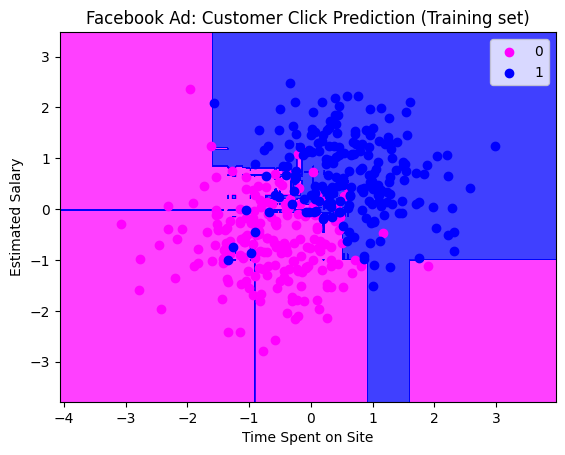

In [99]:
# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-100-f989468f1726>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


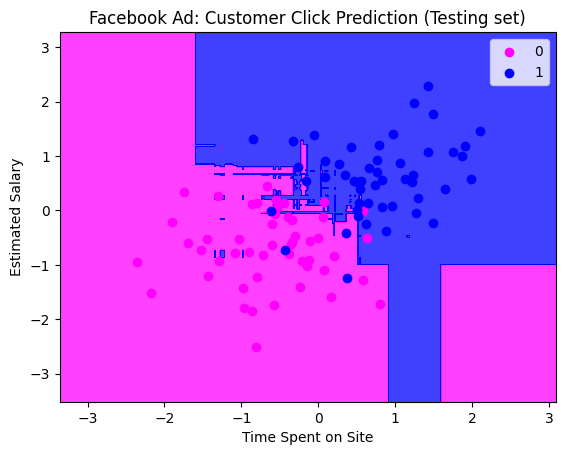

In [100]:
# Visualising the testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()